## Connect to database

In [64]:
%matplotlib inline
import matplotlib
import os
import pandas as pd
import psycopg2

db = psycopg2.connect(dbname=os.environ['DB_NAME'],
                      user=os.environ['DB_USER'],
                      password=os.environ['DB_PASSWORD'],
                      host=os.environ['DB_URL'],
                      port=5432)

## Top names by year

In [74]:
# query params
country = 'us'
sex = 'f'
min_year = 1960
max_year = 1975
sort_by_year=1970

query = f'''
select
  y.year,
  n.name,
  sum(br.births) as number_births,
  sum(br.births) / (y.births_{country.lower()}_{sex.lower()}::float / 1000) as births_per_k
from public.birth_record br
inner join public.name n on n.id = br.name_id
inner join public.year y on y.year = br.year_id
where
  br.sex = '{sex.upper()}' and
  y.year between {int(min_year)} and {int(max_year) if max_year else 2019} and
  br.country = '{country.lower()}'
group by 1, 2
having sum(br.births) > 500
;'''

df = pd.read_sql_query(query, db)
df = df.round({'births_per_k': 2})
df = df.pivot(index='name', columns='year', values='births_per_k')
df = df.sort_values(by=[sort_by_year], ascending=False)

df.head(50)

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975
name,,,,,,,,,,,,,,,,
Jennifer,3.48,4.46,5.42,5.91,6.62,8.32,10.37,10.62,15.71,19.12,25.20,32.40,39.44,40.18,40.30,37.28
Lisa,16.20,20.56,22.73,28.19,27.73,32.98,32.42,30.54,28.97,25.55,21.27,18.78,17.08,14.59,12.63,11.62
Kimberly,8.10,8.36,10.05,10.68,12.33,15.78,18.36,19.28,18.66,18.76,18.63,17.52,16.30,15.14,14.31,12.98
Michelle,4.76,6.13,6.59,7.23,8.27,8.87,15.46,17.96,19.43,19.47,18.59,18.92,18.16,17.33,16.49,14.52
Amy,2.87,3.18,3.54,4.14,4.89,6.31,7.40,9.39,10.00,12.18,13.76,14.97,16.05,17.35,18.88,20.66
Angela,4.17,5.22,5.75,6.68,8.31,10.26,10.55,11.38,12.09,11.94,13.61,14.78,14.61,13.45,14.56,14.97
Melissa,2.12,2.36,3.11,3.68,4.25,5.78,8.12,10.71,12.71,13.06,12.96,13.62,13.96,14.47,14.15,15.48
Tammy,6.88,7.48,8.26,10.66,10.24,9.85,10.61,10.86,11.73,10.81,10.69,10.08,8.81,7.24,5.90,4.82
Mary,24.75,22.96,21.45,20.90,20.94,18.75,16.45,14.74,12.71,11.26,10.48,9.53,8.53,7.92,7.49,7.03


<AxesSubplot:xlabel='year'>

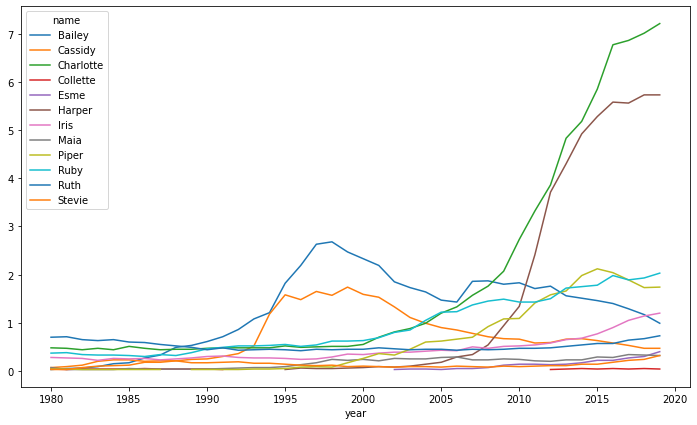

In [73]:
country = 'us'
sex = 'f'
min_year = 1980
max_year = None

names = {
    'm': ['elliot', 'henry', 'jones', 'maddox', 'brooks', 'lincoln', 'reed'],
    'f': ['maia', 'nelle', 'cassidy', 'charlotte', 'lou', 'collette', 'ruth', 'esme', 'harper', 'bailey', 'piper', 'stevie', 'iris', 'ruby', 'devi']
}

query = f'''
select
  y.year,
  n.name,
  sum(br.births) as births,
  sum(br.births) / (y.births_{country.lower()}_{sex.lower()}::float / 1000) as births_per_k
from public.birth_record br
inner join public.name n on n.id = br.name_id
inner join public.year y on y.year = br.year_id
where
  br.country = '{country.lower()}' and
  br.sex = '{sex.upper()}' and
  y.year between {int(min_year)} and {int(max_year) if max_year else 2019} and
  n.name in ({', '.join([f"'{n.title()}'" for n in names[sex]])})
group by 1, 2
having sum(br.births) > 50
;'''

df = pd.read_sql_query(query, db)
df = df.round({'births_per_k': 2})
df = df.pivot(index='year', columns='name', values='births_per_k')
df = df.sort_values(by=['year'], ascending=True)
df.plot.line(figsize=(12, 7))